In [82]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv(r"C:\Users\SHRI\OneDrive\Desktop\DataScience_DataFiles\ML_data\penguins_size.csv")

In [84]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [85]:
df.shape

(344, 7)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [87]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [88]:
df = df.rename(columns = {"sex" : 'gender'})

In [89]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'gender'],
      dtype='object')

In [90]:
continous = ['culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm','body_mass_g']

discrete_categorical = ['species', 'island', 'gender']


In [91]:
df[continous].skew()

culmen_length_mm     0.053118
culmen_depth_mm     -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
dtype: float64

**Data is normally distributed**

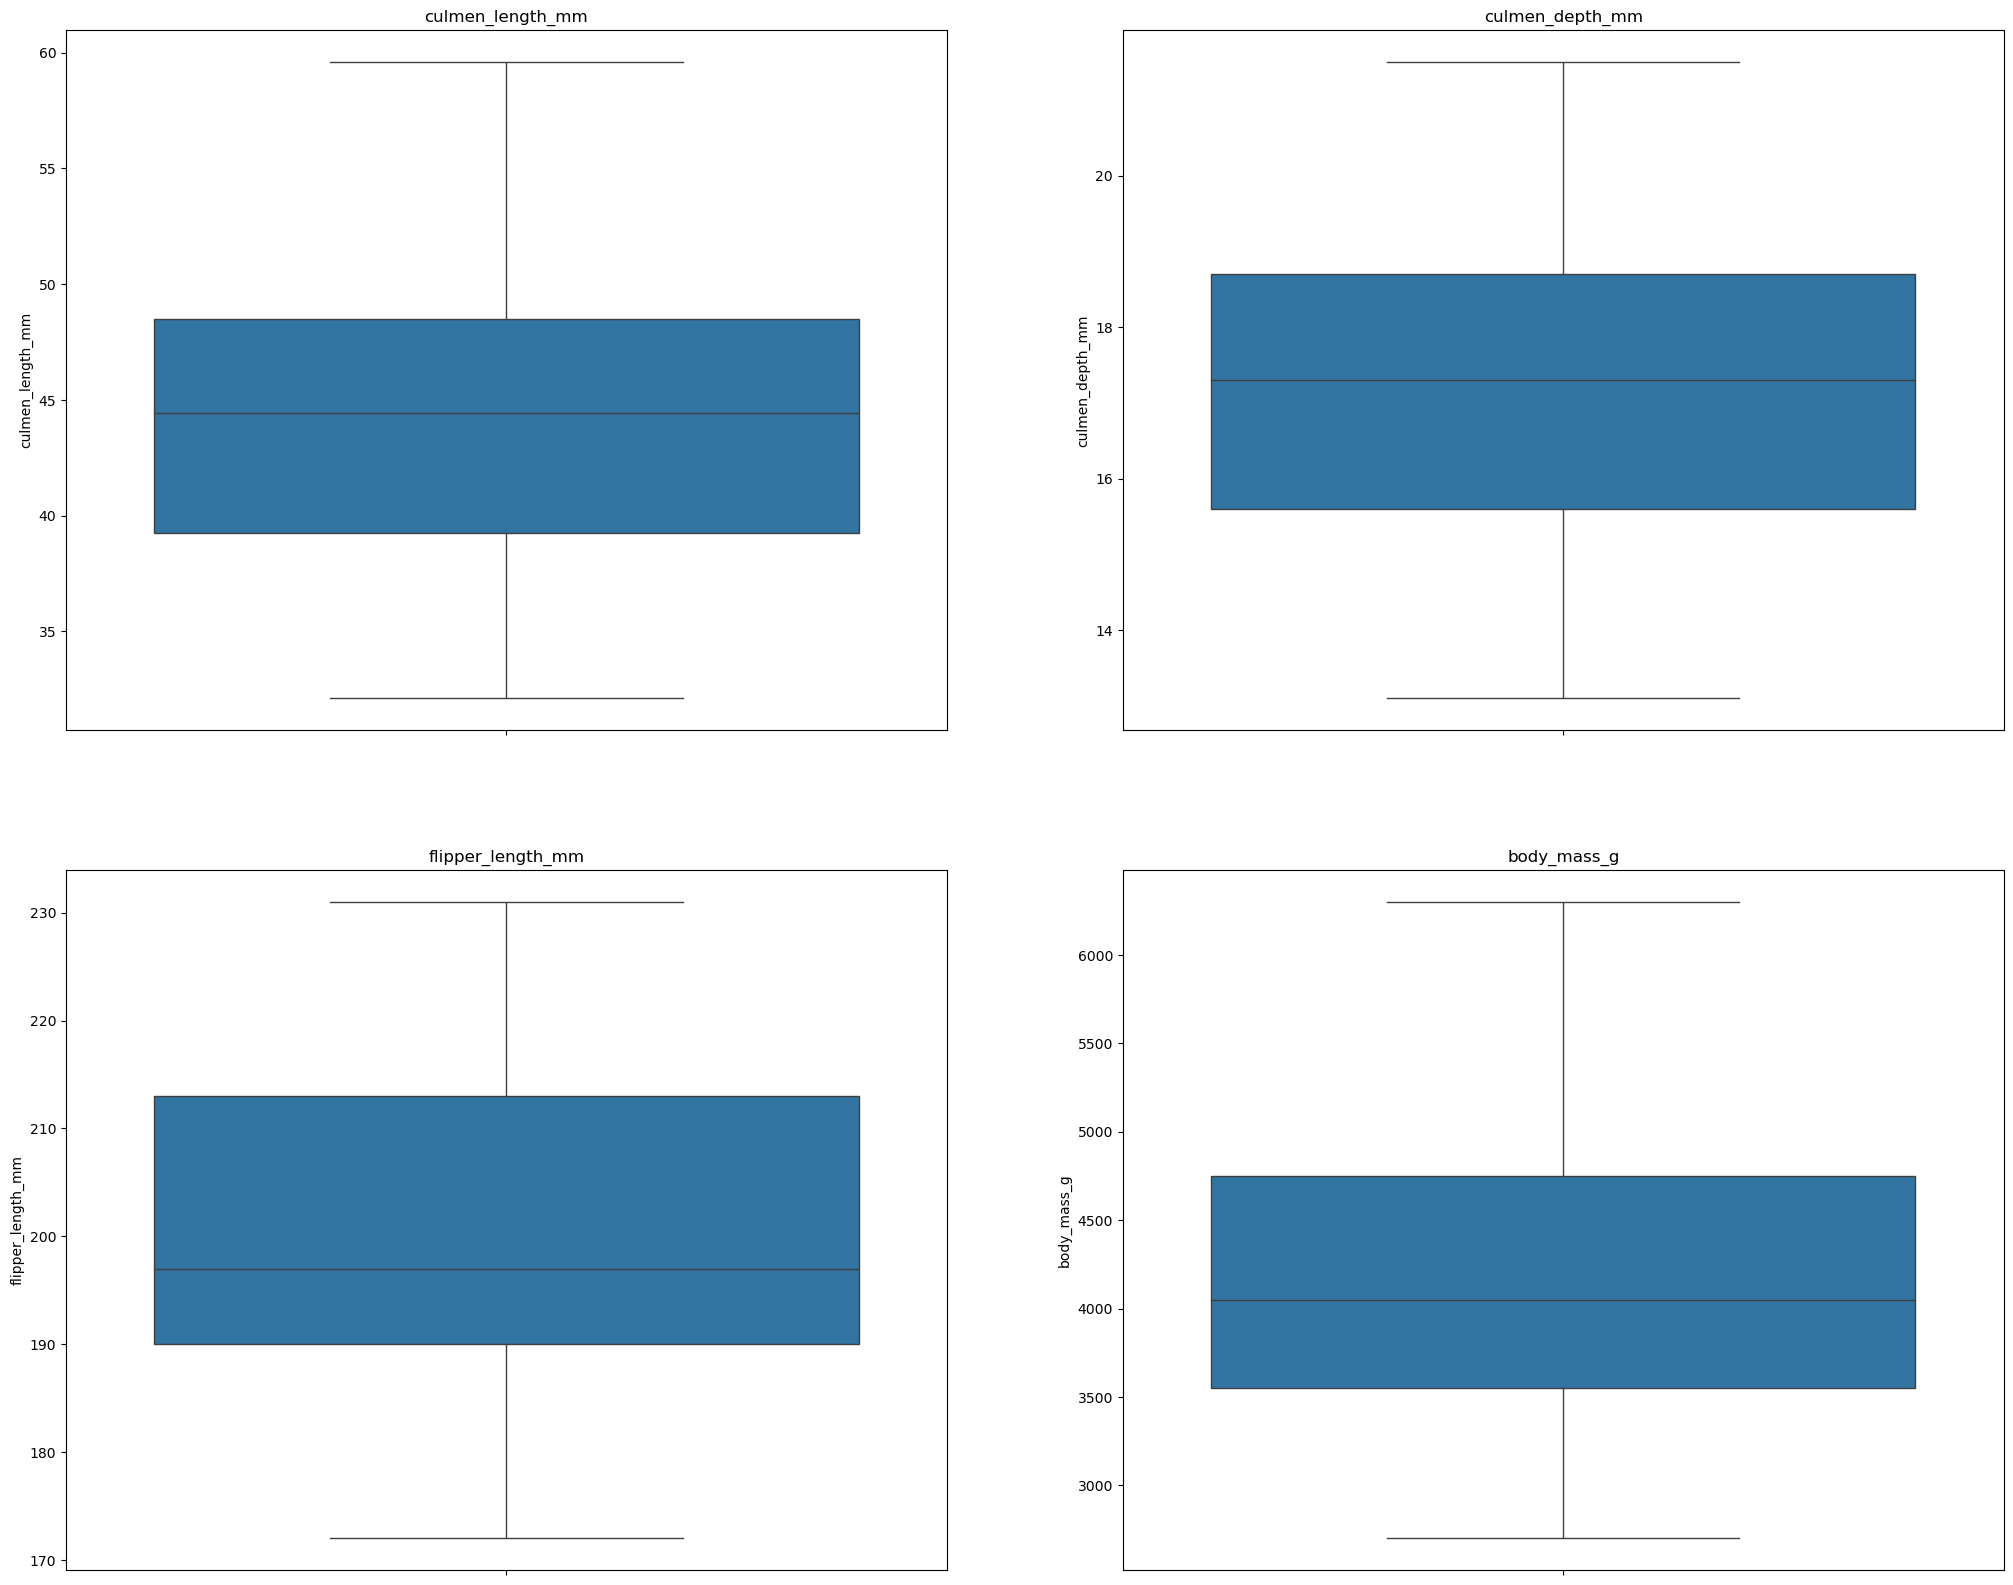

In [92]:
j=1
plt.figure(figsize=(25,20))
for i in continous:
    plt.subplot(2,2,j)
    sns.boxplot(df[i])
    plt.title(f'{i}')
    j=j+1
plt.show()

**No outliers means data is cleaned**

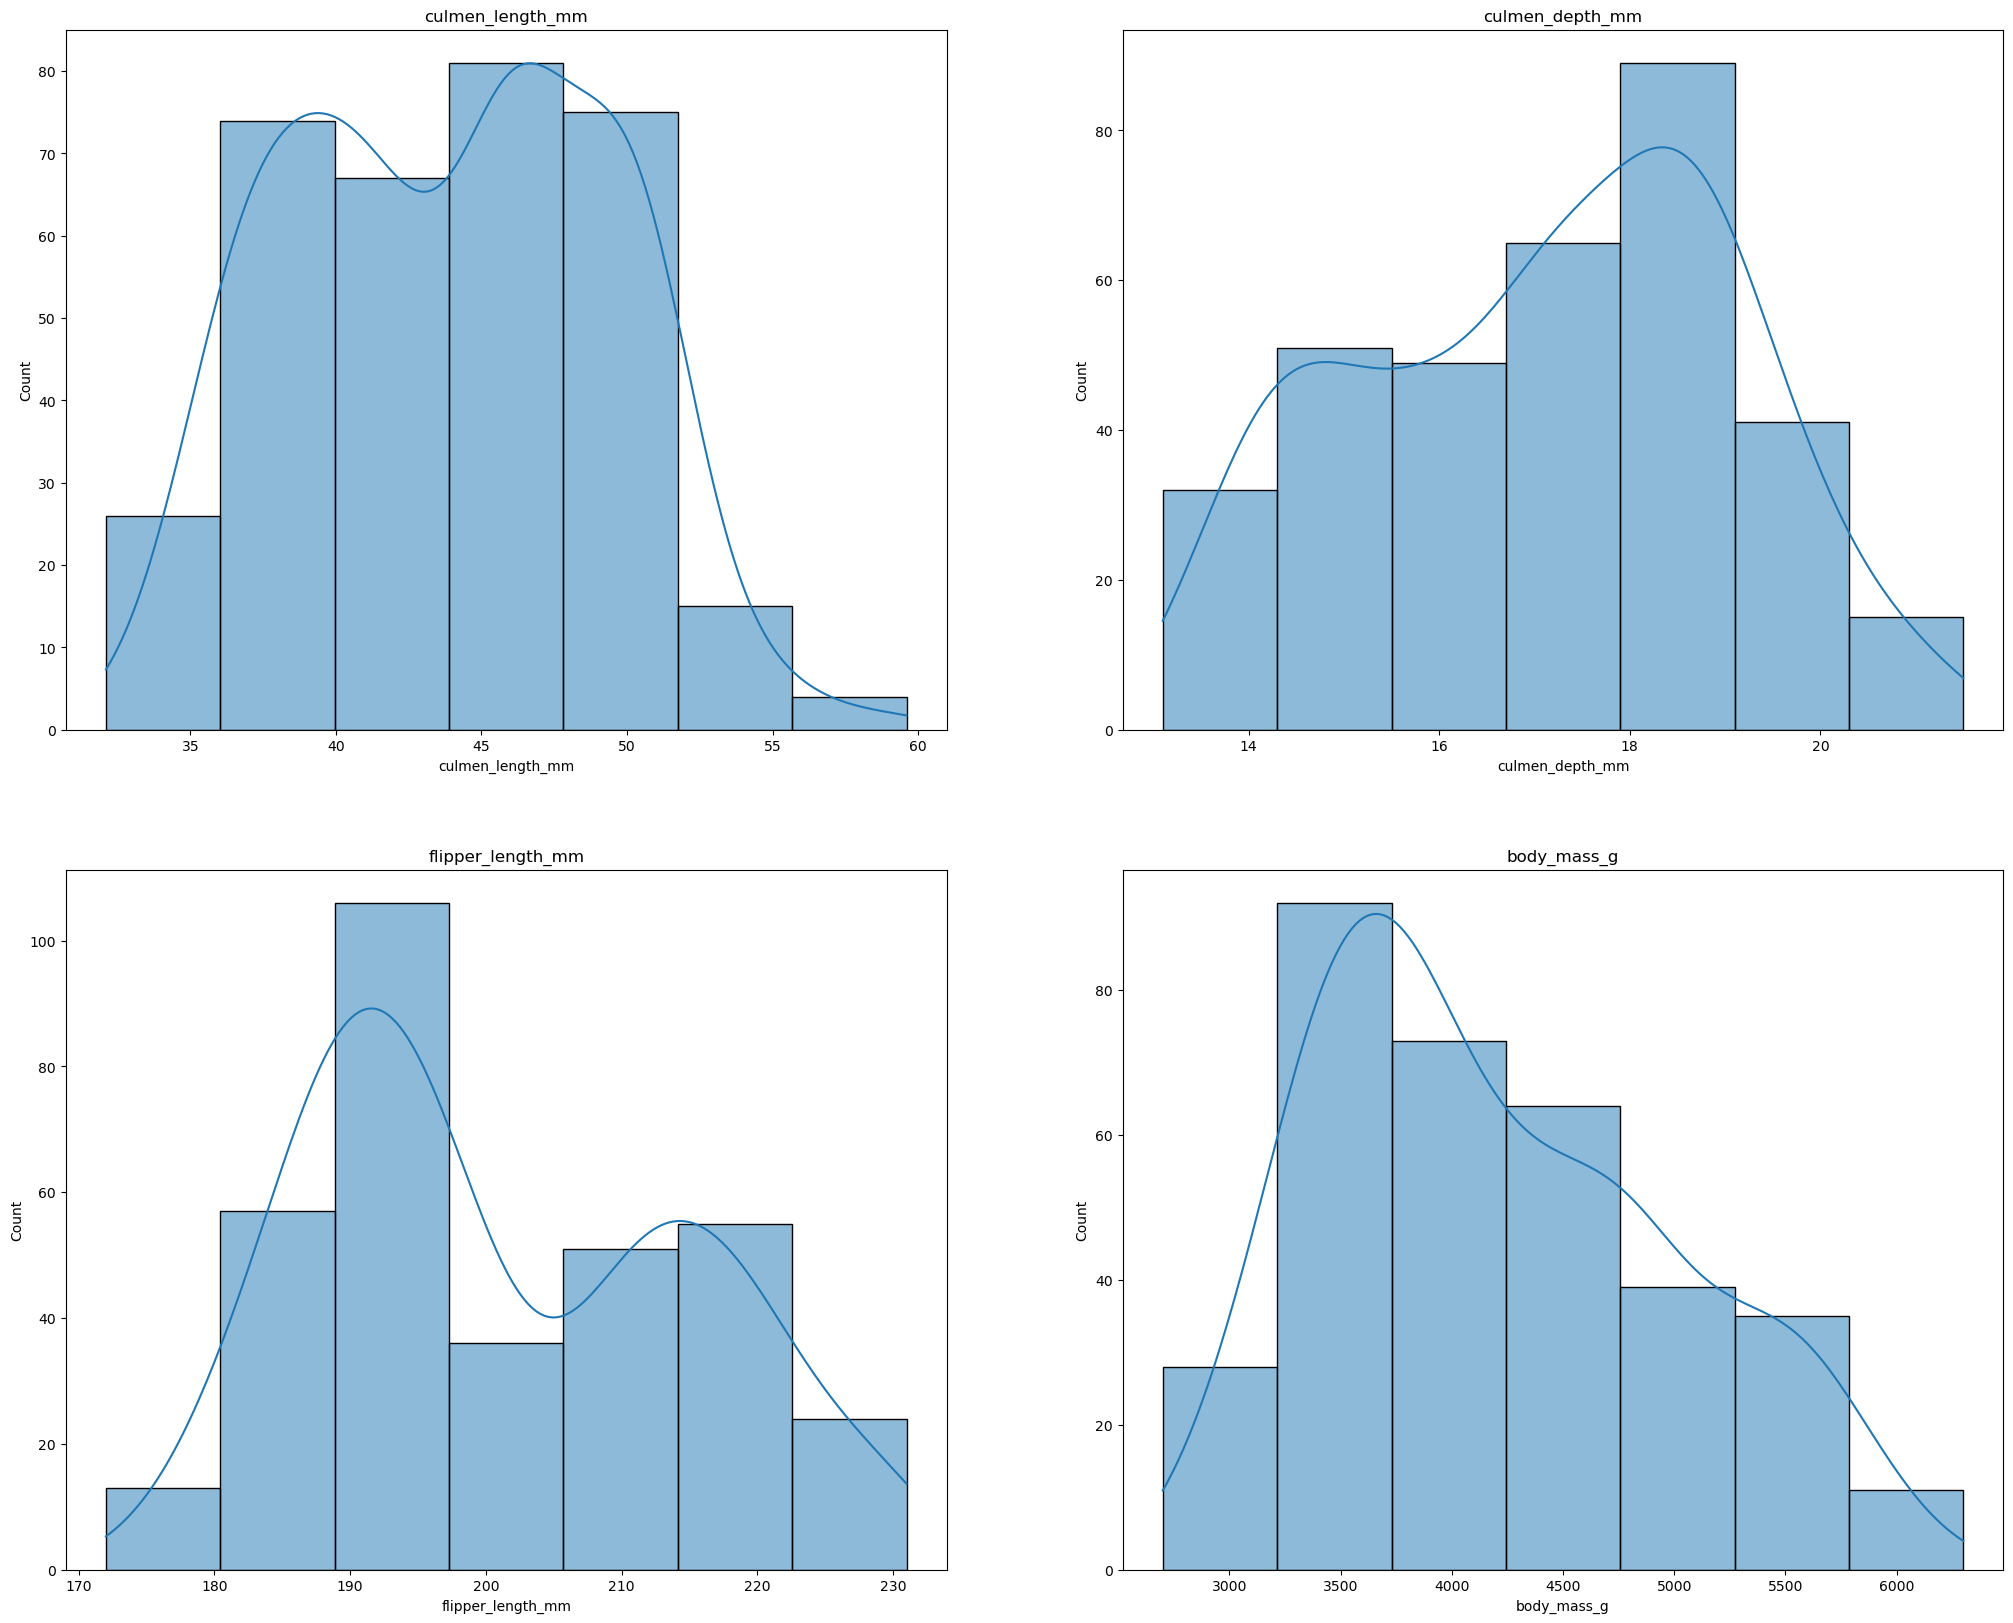

In [93]:
j=1
plt.figure(figsize=(25,20))
for i in continous:
    plt.subplot(2,2,j)
    sns.histplot(df[i], bins = 7, kde = True)
    plt.title(f'{i}')
    j=j+1
plt.show()

**Data is normally distributed**

In [94]:
for i in discrete_categorical:
    print(i, " : ", df[i].value_counts())
    print("=============================================")

species  :  species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island  :  island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
gender  :  gender
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64


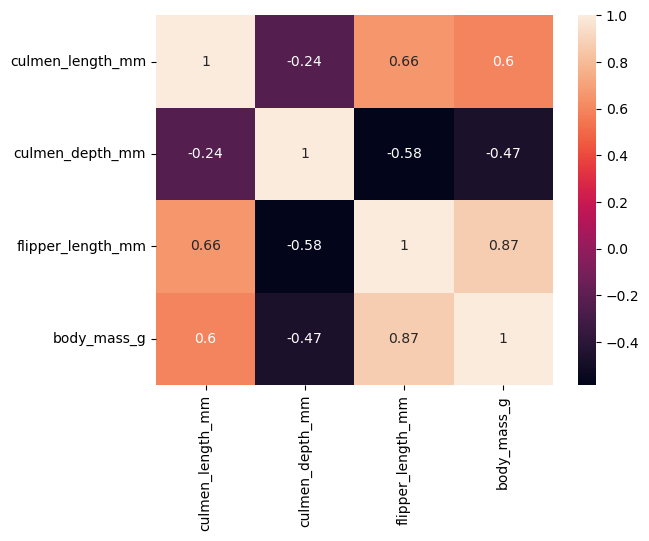

In [95]:
sns.heatmap(df[continous].corr(), annot = True)
plt.show()


# Data Cleaning

**Check Unique Values**

In [96]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
gender               10
dtype: int64

In [97]:
df = df.dropna()

In [98]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
gender               0
dtype: int64

In [99]:
for i in df:
    print(i , " : ", df[i].unique())
    print("================================================")
    

species  :  ['Adelie' 'Chinstrap' 'Gentoo']
island  :  ['Torgersen' 'Biscoe' 'Dream']
culmen_length_mm  :  [39.1 39.5 40.3 36.7 39.3 38.9 39.2 41.1 38.6 34.6 36.6 38.7 42.5 34.4
 46.  37.8 37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2 40.9 36.4 42.2
 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 42.3 40.1 35.  42.  34.5 41.4
 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2 42.1 42.9 35.1
 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7 40.2 35.2 41.5
 38.5 43.1 36.8 37.5 35.6 32.1 40.7 46.5 50.  51.3 45.4 52.7 45.2 46.1
 46.6 51.7 47.  52.  45.9 50.5 50.3 58.  46.4 49.2 42.4 48.5 50.6 46.7
 49.5 52.8 54.2 51.  49.7 47.5 47.6 46.9 53.5 49.  46.2 50.9 45.5 50.8
 50.1 51.5 49.8 48.1 51.4 45.7 50.7 52.2 49.3 50.2 51.9 46.8 55.8 43.5
 49.6 48.7 43.3 48.4 45.1 46.3 47.8 48.2 47.3 59.6 49.1 42.6 44.4 44.
 45.3 43.6 44.9 45.  43.8 50.4 54.3 47.7 48.6 51.1 52.5 47.4 43.4 52.1
 44.5 49.4 55.9 47.2 41.7 53.4 55.1 48.8 49.9]
culmen_depth_mm  :  [18.7 17.4 18.  19.3 20.6 17.8 19.6 17.6 21.2 

**By checking null values we an observe some wrong data entered in gender column we have to replce it**

In [100]:
df['gender'].value_counts()

gender
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

**By checking valuecounts only one wrong data is there either we can replace or delete record**

**We will go with the majority male and replace wrong data with male**

In [101]:
df['gender'].replace(".", inplace=True)

C:\Users\SHRI\AppData\Local\Temp\ipykernel_8216\2670077221.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['gender'].replace(".", inplace=True)
C:\Users\SHRI\AppData\Local\Temp\ipykernel_8216\2670077221.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace(".", inplace=True)


In [102]:
df['gender'].value_counts()

gender
MALE      169
FEMALE    165
Name: count, dtype: int64

In [103]:
df.columns.tolist()

['species',
 'island',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'gender']

**All columns are given in the correct format**

In [104]:
df[continous].describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


In [105]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# Encoding

In [110]:
# Label Encoding:  species is output variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])


In [107]:
# one hot encoding
df = pd.get_dummies(df, columns=['island', 'gender'], drop_first=True)
df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,gender_MALE
0,0,39.1,18.7,181.0,3750.0,False,True,True
1,0,39.5,17.4,186.0,3800.0,False,True,False
2,0,40.3,18.0,195.0,3250.0,False,True,False
4,0,36.7,19.3,193.0,3450.0,False,True,False
5,0,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...,...
338,2,47.2,13.7,214.0,4925.0,False,False,False
340,2,46.8,14.3,215.0,4850.0,False,False,False
341,2,50.4,15.7,222.0,5750.0,False,False,True
342,2,45.2,14.8,212.0,5200.0,False,False,False


In [109]:
for i in df:
    print(i , " : ", df[i].unique())
    print("================================================")
    

species  :  [0 1 2]
culmen_length_mm  :  [39.1 39.5 40.3 36.7 39.3 38.9 39.2 41.1 38.6 34.6 36.6 38.7 42.5 34.4
 46.  37.8 37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2 40.9 36.4 42.2
 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 42.3 40.1 35.  42.  34.5 41.4
 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2 42.1 42.9 35.1
 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7 40.2 35.2 41.5
 38.5 43.1 36.8 37.5 35.6 32.1 40.7 46.5 50.  51.3 45.4 52.7 45.2 46.1
 46.6 51.7 47.  52.  45.9 50.5 50.3 58.  46.4 49.2 42.4 48.5 50.6 46.7
 49.5 52.8 54.2 51.  49.7 47.5 47.6 46.9 53.5 49.  46.2 50.9 45.5 50.8
 50.1 51.5 49.8 48.1 51.4 45.7 50.7 52.2 49.3 50.2 51.9 46.8 55.8 43.5
 49.6 48.7 43.3 48.4 45.1 46.3 47.8 48.2 47.3 59.6 49.1 42.6 44.4 44.
 45.3 43.6 44.9 45.  43.8 50.4 54.3 47.7 48.6 51.1 52.5 47.4 43.4 52.1
 44.5 49.4 55.9 47.2 41.7 53.4 55.1 48.8 49.9]
culmen_depth_mm  :  [18.7 17.4 18.  19.3 20.6 17.8 19.6 17.6 21.2 21.1 19.  20.7 18.4 21.5
 18.3 19.2 18.1 17.2 18.9 18.6 17.9 16.7 

# Save the cleaned data

In [108]:
df.to_csv('cleaned_dataset_penguin.csv', index=False)